In [72]:
# necessary imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import zero_one_loss
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)

In [73]:
df=pd.read_csv('kidney_disease.csv')

In [74]:
#printing some of the data just first columns
df.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.1,142.0,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,54.0,24.0,104.0,4.0,12.4,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.1,NaN,NaN,12.4,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.9,NaN,NaN,10.8,33,9600,4,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [75]:
df.shape

(400, 26)

In [76]:
df.describe().style.background_gradient(cmap = 'copper')

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [78]:
#dropping id column
df.drop('id',axis=1,inplace=True)

In [79]:
#renaming the columns of the dataset
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema',
              'anemia', 'class']

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [81]:
df.head(10)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.1,142.0,3.2,12.2,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,54.0,24.0,104.0,4.0,12.4,36,NaN,NaN,no,no,no,good,no,no,ckd
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,31.0,1.1,NaN,NaN,12.4,44,6900,5,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,60.0,1.9,NaN,NaN,10.8,33,9600,4,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,107.0,7.2,114.0,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [82]:
#conversion of specific columns to numeric type 
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [84]:
#correcting the values of the data
df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')
df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [85]:
#mapping the chronic kidney disease(ckd) to the value 0 and !(ckd) to 1
#convert the class column to numeric type
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [86]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



Plotting to view the current status of the data

In [87]:
#extracting categorical columns
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
#extracting numerical columns
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [88]:
#printing unique values in categorical columns
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

appetite has ['good' 'poor' nan] values

pedal_edema has ['no' 'yes' nan] values

anemia has ['no' 'yes' nan] values



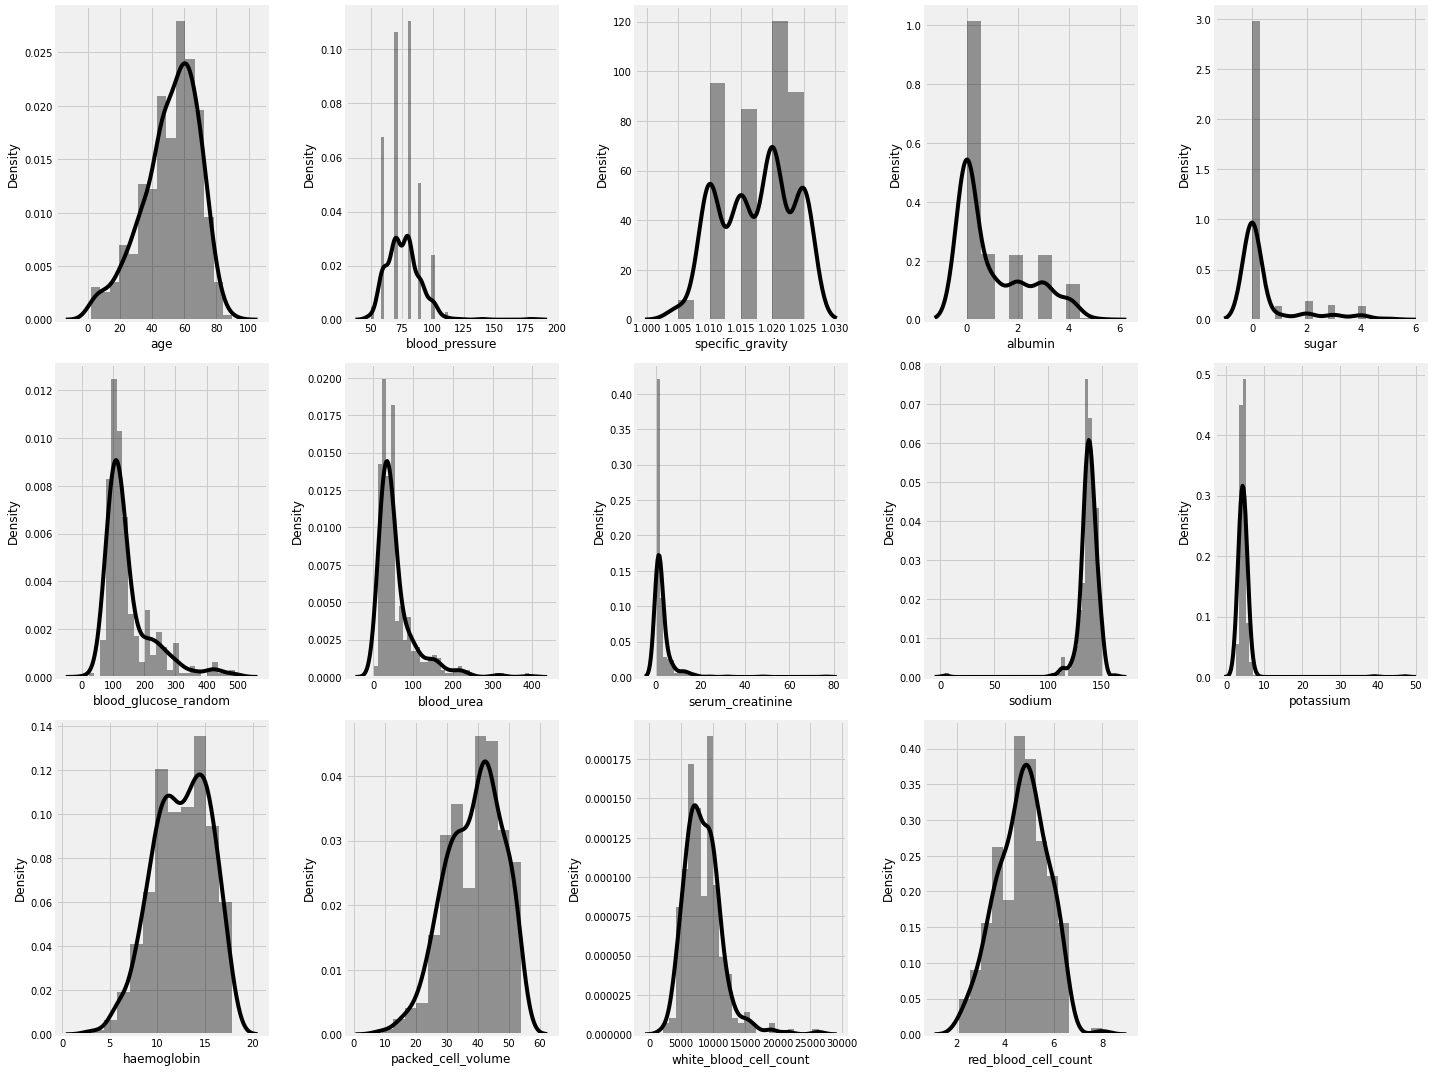

In [89]:
# checking numerical features distribution
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column],color='black',)
        plt.xlabel(column)
    
        
    plotnumber += 1

plt.tight_layout()
plt.show()

The above graph shows that there is skewness present in some columns.

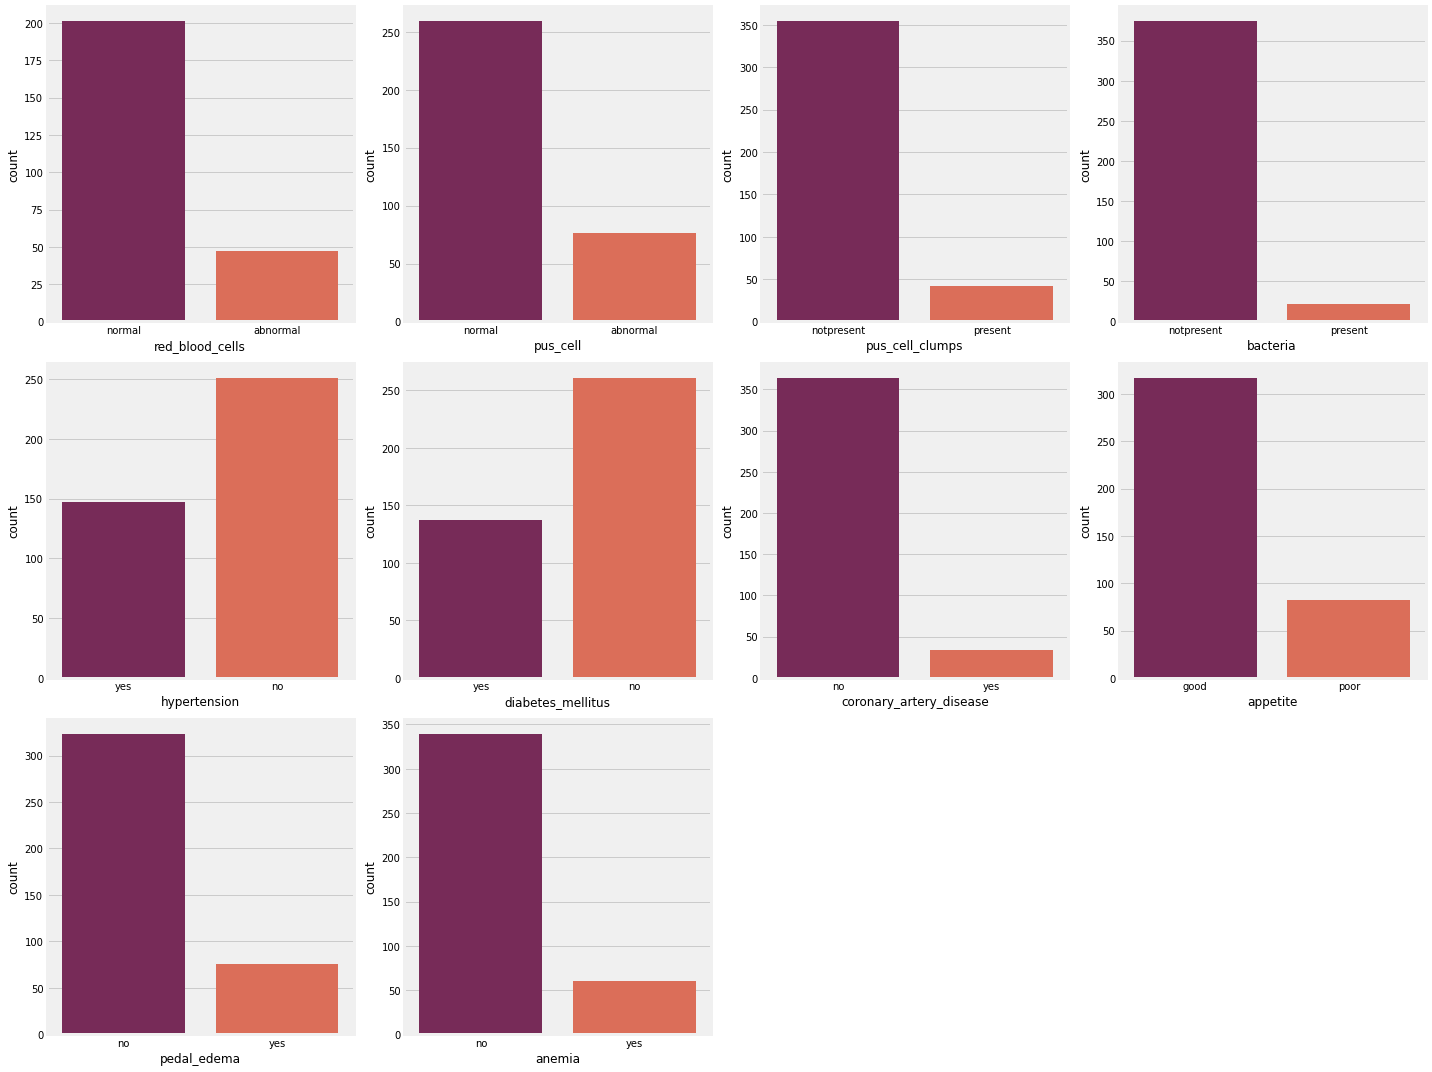

In [90]:
# checking categorical columns distribution
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'rocket',color='black')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

we find the presense of different proportions among the columns.

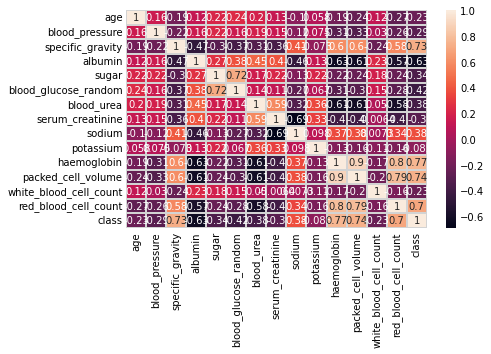

In [91]:
#correlation caluculation
cor=df.corr()
sns.heatmap(cor, annot = True, linewidths = 1, linecolor = 'lightgrey')

Lets explore the data.

In [92]:
px.scatter(df, x="age", y="blood_pressure", color="class")

In [93]:
px.scatter(df, x="age", y="sugar", color="class")

In [94]:
px.scatter(df, x="age", y="haemoglobin", color="class", marginal_y="violin", marginal_x="box")

In [95]:
px.scatter(df, x="age", y="bacteria", color="class", marginal_y="violin", marginal_x="box")

In [96]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [97]:
px.violin(df, y="age", x="sugar", color="class", box=True, points="all")

In [98]:
px.scatter_3d(df, x='age', y='hypertension', z='sugar', color='class')

processing the data

In [99]:
df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

fixing the missing values issue

In [100]:
df[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
class                       0
dtype: int64

In [101]:
df[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
dtype: int64

**Random sampling for higher values and mean or mode sampling for lower null values.**

In [102]:
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [103]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
class                     0
dtype: int64

In [104]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
dtype: int64

# **FEATURE ENCODING**

In [105]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

pedal_edema has 2 categories

anemia has 2 categories



**Using label encoder as each column have two classes**


In [106]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [107]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,121.0,36.0,1.2,139.0,4.3,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,110.0,18.0,0.8,135.0,6.6,11.3,38.0,6000.0,4.7,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,138.0,4.9,9.6,31.0,7500.0,5.5,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,147.0,4.2,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


# **Making of the Machine learning Model**

In [108]:
# data splitting in X,y
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [109]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [110]:
print("The shape of X_train",X_train.shape)
print("The shape of X_test",X_test.shape)
print("The shape of X_train",y_train.shape)
print("The shape of X_test",y_test.shape)

The shape of X_train (320, 24)
The shape of X_test (80, 24)
The shape of X_train (320,)
The shape of X_test (80,)


# **Random forest Classifier**

In [111]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [112]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [113]:
print('model_DT Train Score is : ' , classifier.score(X_train, y_train))
print('model_DT Test Score is : ' , classifier.score(X_test, y_test))

model_DT Train Score is :  0.99375
model_DT Test Score is :  0.9875


***Accuracy of the model***

In [114]:
print("The Score is: ",accuracy_score(y_test , y_pred)*100)

The Score is:  98.75


In [115]:
#probability of all values
pr1 = classifier.predict_proba(X_test)[0:10,:]
pr1[:2]

array([[0.8, 0.2],
       [0.6, 0.4]])

In [116]:
#probability of zeros
pr2 = classifier.predict_proba(X_test)[0:10,0]
pr2[:2]

array([0.8, 0.6])

In [117]:
#probability of ones
pr3 = classifier.predict_proba(X_test)[0:10,1]
pr3[:2]

array([0.2, 0.4])

In [118]:
#  Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)

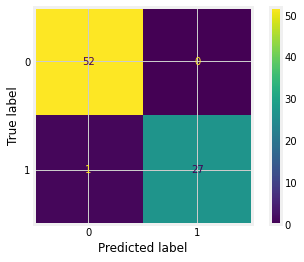

In [119]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=classifier.classes_)
disp.plot()
plt.show()

In [120]:
# mean_absolute_error
from sklearn.metrics import mean_absolute_error
meanabs =mean_absolute_error(y_test, y_pred)
# mean_squared_error
from sklearn.metrics import mean_squared_error
meansq =mean_squared_error(y_test, y_pred)
# median_absolute_error
from sklearn.metrics import median_absolute_error
medianab =median_absolute_error(y_test, y_pred)

In [121]:
print("The mean_absolute_error",meanabs)
print("The mean_Squre_error",meansq)
print("The Medain_absolute_error",medianab)

The mean_absolute_error 0.0125
The mean_Squre_error 0.0125
The Medain_absolute_error 0.0


# **Decision Tree Classifier**

In [122]:
from sklearn.tree import DecisionTreeClassifier
# Creating model object
model_dt = DecisionTreeClassifier( )
# Training Model
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [123]:
# Making Prediction
pred_dt = model_dt.predict(X_test)

In [124]:
print('model_DT Train Score is : ' , model_dt.score(X_train, y_train))
print('model_DT Test Score is : ' , model_dt.score(X_test, y_test))

model_DT Train Score is :  1.0
model_DT Test Score is :  0.9875


***Accuracy of the model***

In [125]:
print('bt accuracy ' , accuracy_score(y_test , pred_dt))

bt accuracy  0.9875


In [126]:
from sklearn.metrics import plot_confusion_matrix
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, pred_dt)

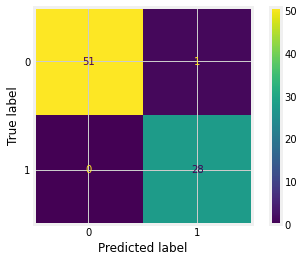

In [127]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=model_dt.classes_)
disp.plot()
plt.show()

In [128]:
# mean_absolute_error
from sklearn.metrics import mean_absolute_error
meanabs =mean_absolute_error(y_test, pred_dt)
# mean_squared_error
from sklearn.metrics import mean_squared_error
meansq =mean_squared_error(y_test, pred_dt)
# median_absolute_error
from sklearn.metrics import median_absolute_error
medianab =median_absolute_error(y_test, pred_dt)

In [129]:
print("The mean_absolute_error = ",meanabs)
print("The mean_Squre_error = ",meansq)
print("The Medain_absolute_error = ",medianab)

The mean_absolute_error =  0.0125
The mean_Squre_error =  0.0125
The Medain_absolute_error =  0.0


In [130]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix #for model evaluation
confusion_matrix2=confusion_matrix(y_test,pred_dt)
confusion_matrix2

array([[51,  1],
       [ 0, 28]])

In [131]:
total=sum(sum(confusion_matrix2))

sensitivity = confusion_matrix2[0,0]/(confusion_matrix2[0,0]+confusion_matrix2[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix2[1,1]/(confusion_matrix2[1,1]+confusion_matrix2[0,1])
print('Specificity : ', specificity)

Sensitivity :  1.0
Specificity :  0.9655172413793104


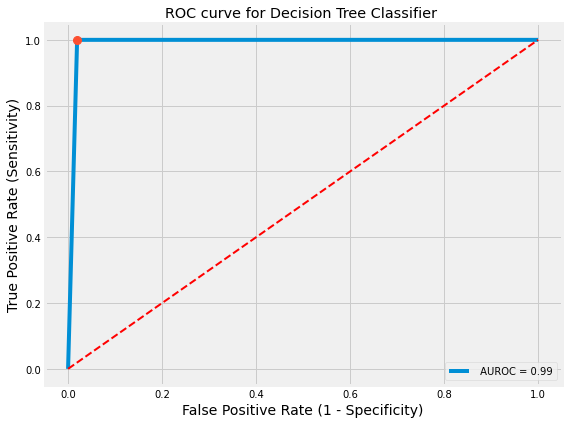

In [132]:
from sklearn.metrics import roc_curve, auc #for model evaluation
from matplotlib import pyplot
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(y_test,pred_dt)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for Decision Tree Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

# **XGB Classifier**

In [133]:
from xgboost import XGBClassifier
from sklearn import metrics
# Creating model object
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier()

In [134]:
pred_xgb= model_xgb.predict(X_test)

In [135]:
print('model_xgb Train Score is : ' , model_xgb.score(X_train, y_train))
print('model_xgb Test Score is : ' , model_xgb.score(X_test, y_test))

model_xgb Train Score is :  1.0
model_xgb Test Score is :  0.975


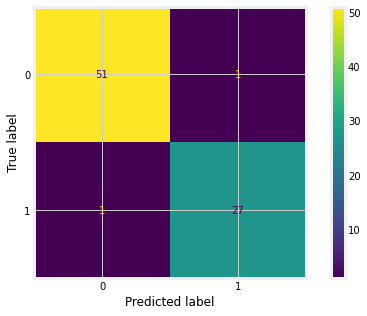

In [136]:
import matplotlib
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
matplotlib.rcParams['figure.figsize'] = (8,5)
plot_confusion_matrix(model_xgb,X_test,y_test);

In [137]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix #for model evaluation
confusion_matrix=confusion_matrix(y_test,pred_xgb)
confusion_matrix

array([[51,  1],
       [ 1, 27]])

In [138]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.9807692307692307
Specificity :  0.9642857142857143


In [139]:
total=sum(sum(confusion_matrix))

ppv = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])
print('ppv : ', ppv )

npv = confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])
print('npv : ', npv)

ppv :  0.9807692307692307
npv :  0.9642857142857143


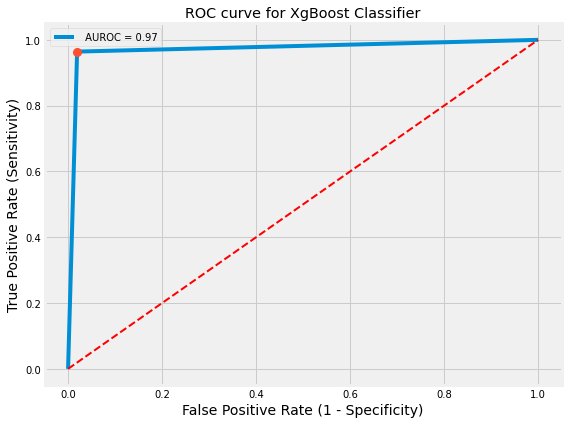

In [140]:
from sklearn.metrics import roc_curve, auc #for model evaluation
from matplotlib import pyplot
fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(y_test,pred_xgb)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for XgBoost Classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()